In [2]:
! pip install --user jovian

     -------------------------------------- 68.6/68.6 kB 621.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6480 sha256=5bdb798a848ff766b9cf0ea114e7b3b654433399a2bec1fc4f5782c208c32b61
  Stored in directory: c:\users\balun\appdata\local\pip\cache\wheels\05\d7\b4\4795d29c6decfffbf64c63e58b6c8b8bbfd4751488617dcd7a
Successfully built uuid


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import torch
import jovian
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split

In [3]:

DATA_FILENAME = "car_data.csv"
dataframe_raw = pd.read_csv(DATA_FILENAME)
dataframe_raw.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
your_name = "ranga" # at least 5 characters
def customize_dataset(dataframe_raw, rand_str):
    dataframe = dataframe_raw.copy(deep=True)

    # drop some rows
    dataframe = dataframe.sample(int(0.95*len(dataframe)), random_state=int(ord(rand_str[0])))
    # scale input
    dataframe.Year = dataframe.Year * ord(rand_str[1])/100.
    # scale target
    dataframe.Selling_Price = dataframe.Selling_Price * ord(rand_str[2])/100.
    # drop column
    if ord(rand_str[3]) % 2 == 1:
        dataframe = dataframe.drop(['Car_Name'], axis=1)
    return dataframe

dataframe = customize_dataset(dataframe_raw, your_name)
dataframe.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
108,1955.52,1.320,1.50,18000,Petrol,Individual,Manual,0
5,1957.46,10.175,9.83,2071,Diesel,Dealer,Manual,0
96,1955.52,22.825,25.39,29000,Diesel,Dealer,Automatic,0
239,1951.64,2.200,4.43,23709,Petrol,Dealer,Manual,0
134,1956.49,0.715,0.81,11800,Petrol,Individual,Manual,0


In [8]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    categorical_cols = ['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']
    for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array

inputs_array, targets_array = dataframe_to_arrays(dataframe)
inputs_array, targets_array

NameError: name 'input_cols' is not defined

In [7]:
inputs = torch.Tensor(inputs_array)
targets = torch.Tensor(targets_array)

dataset = TensorDataset(inputs, targets)
train_ds, val_ds = random_split(dataset, [228, 57])
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

NameError: name 'inputs_array' is not defined

In [12]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('car_data.csv')
data


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [13]:

# Handle missing values if any
data.dropna(inplace=True)

# Encoding categorical variables
label_encoder = LabelEncoder()
data['Fuel_Type'] = label_encoder.fit_transform(data['Fuel_Type'])
data['Seller_Type'] = label_encoder.fit_transform(data['Seller_Type'])
data['Transmission'] = label_encoder.fit_transform(data['Transmission'])

# Splitting the dataset into features and target variable
X = data.drop(['Selling_Price'], axis=1)

y = data['Selling_Price']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Now, X_train and X_test contain scaled features, and y_train and y_test contain the corresponding labels


ValueError: could not convert string to float: 'Bajaj Pulsar 150'

In [15]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'X_train' is your feature matrix containing categorical variables
label_encoder = LabelEncoder()

# Apply label encoding to each column of 'X_train' containing categorical data
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = label_encoder.fit_transform(X_train[col])

# Now, you can proceed with feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


# 1 DATA PREPROCESSING

In [ ]:
#Step 1: Import the necessary libraries

In [1]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Step 2: Load the dataset

In [3]:
# Load the dataset
df = pd.read_csv('diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
#Check the data info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#We can also check the null values using df.isnull()

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Step 3: Statistical Analysis

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Step 4: Check the outliers:

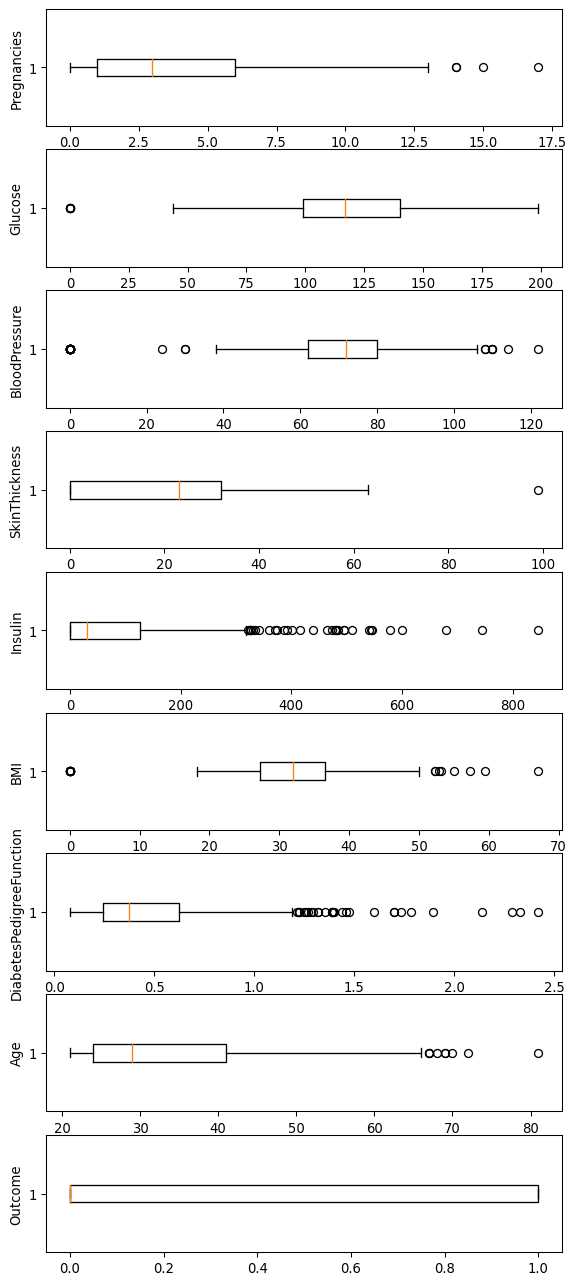

In [7]:
# Box Plots
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [ ]:
#Drop the outliers

In [11]:
# Identify the quartiles
q1, q3 = np.percentile(df['Insulin'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = df[(df['Insulin'] >= lower_bound) 
                & (df['Insulin'] <= upper_bound)]
 
 
# Identify the quartiles
q1, q3 = np.percentile(clean_data['Pregnancies'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Pregnancies'] >= lower_bound) 
                        & (clean_data['Pregnancies'] <= upper_bound)]
 
 
# Identify the quartiles
q1, q3 = np.percentile(clean_data['Age'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Age'] >= lower_bound) 
                        & (clean_data['Age'] <= upper_bound)]
 
 
# Identify the quartiles
q1, q3 = np.percentile(clean_data['Glucose'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Glucose'] >= lower_bound) 
                        & (clean_data['Glucose'] <= upper_bound)]
 
 
# Identify the quartiles
q1, q3 = np.percentile(clean_data['BloodPressure'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (0.75 * iqr)
upper_bound = q3 + (0.75 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['BloodPressure'] >= lower_bound) 
                        & (clean_data['BloodPressure'] <= upper_bound)]
 
 
# Identify the quartiles
q1, q3 = np.percentile(clean_data['BMI'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['BMI'] >= lower_bound) 
                        & (clean_data['BMI'] <= upper_bound)]
 
 
# Identify the quartiles
q1, q3 = np.percentile(clean_data['DiabetesPedigreeFunction'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
 
# Drop the outliers
clean_data = clean_data[(clean_data['DiabetesPedigreeFunction'] >= lower_bound) 
                        & (clean_data['DiabetesPedigreeFunction'] <= upper_bound)]


In [ ]:
#Step 5: Correlation

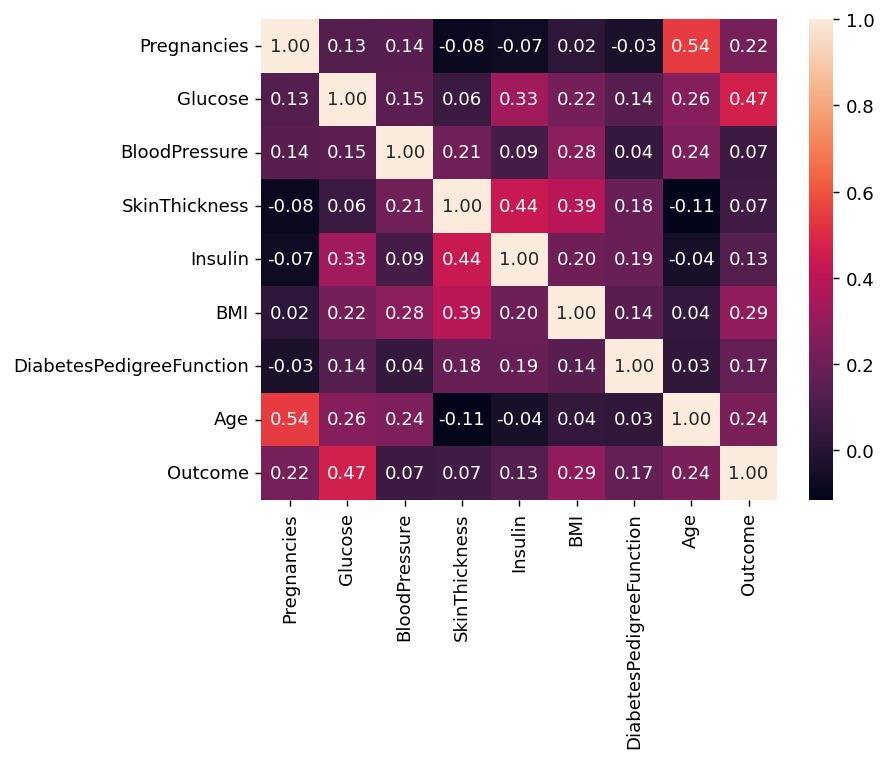

In [12]:
#correlation
corr = df.corr()
 
plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()

In [ ]:
#We can also camapare by single columns in descending order

In [13]:
corr['Outcome'].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [ ]:
#Check Outcomes Proportionality

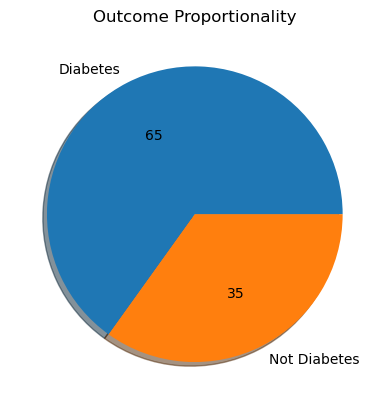

In [14]:
plt.pie(df.Outcome.value_counts(), 
        labels= ['Diabetes', 'Not Diabetes'], 
        autopct='%.f', shadow=True)
plt.title('Outcome Proportionality')
plt.show()

In [ ]:
#Step 6: Separate independent features and Target Variables

In [15]:
# separate array into input and output components
X = df.drop(columns =['Outcome'])
Y = df.Outcome

In [ ]:
#Step 7: Normalization or Standardization

In [16]:
# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
 
# learning the statistical parameters for each of the data and transforming
rescaledX = scaler.fit_transform(X)
rescaledX[:5]

array([[0.35294118, 0.74371859, 0.59016393, 0.35353535, 0.        ,
        0.50074516, 0.23441503, 0.48333333],
       [0.05882353, 0.42713568, 0.54098361, 0.29292929, 0.        ,
        0.39642325, 0.11656704, 0.16666667],
       [0.47058824, 0.91959799, 0.52459016, 0.        , 0.        ,
        0.34724292, 0.25362938, 0.18333333],
       [0.05882353, 0.44723618, 0.54098361, 0.23232323, 0.11111111,
        0.41877794, 0.03800171, 0.        ],
       [0.        , 0.68844221, 0.32786885, 0.35353535, 0.19858156,
        0.64232489, 0.94363792, 0.2       ]])

In [ ]:
#Standardization

In [17]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
rescaledX[:5]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ]])

# 2 Exploratory Data Analysis (EDA) Using Python

In [1]:
import pandas as pd
import numpy as np
# read datasdet using pandas
df = pd.read_csv('employees.csv')
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [2]:
df.shape

(1000, 8)

In [3]:
df.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [4]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [5]:
# convert "Start Date" column to datetime data type
df['Start Date'] = pd.to_datetime(df['Start Date'])

In [6]:
df.nunique()

First Name           200
Gender                 2
Start Date           972
Last Login Time      720
Salary               995
Bonus %              971
Senior Management      2
Team                  10
dtype: int64

In [7]:
df.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [8]:
df["Gender"].fillna("No Gender", inplace = True) 
   
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

In [9]:
mode = df['Senior Management'].mode().values[0]
df['Senior Management']= df['Senior Management'].replace(np.nan, mode)
 
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                 43
dtype: int64

In [10]:
df = df.dropna(axis = 0, how ='any')
 
print(df.isnull().sum())
df.shape

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64


(899, 8)

In [11]:
from sklearn.preprocessing import LabelEncoder
# create an instance of LabelEncoder
le = LabelEncoder()
 
# fit and transform the "Senior Management" 
# column with LabelEncoder
df['Gender'] = le.fit_transform\
                    (df['Gender'])

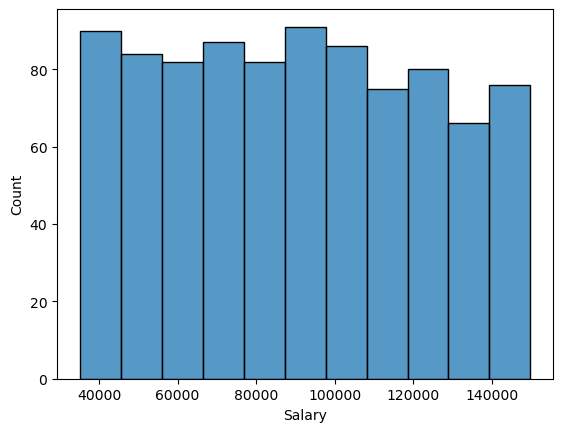

In [12]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
   
   
sns.histplot(x='Salary', data=df, )
plt.show()

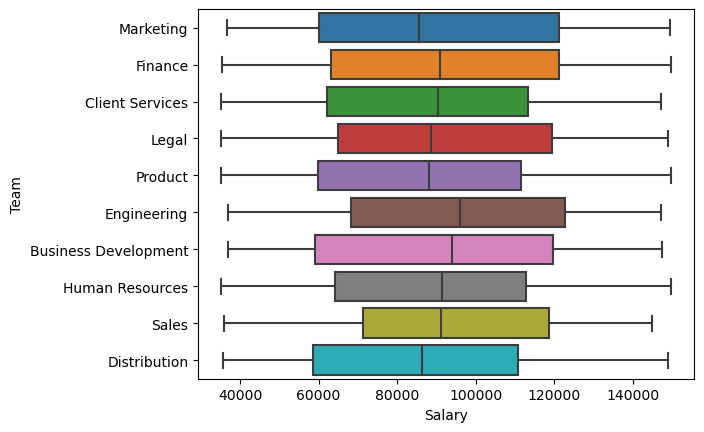

In [13]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
 
 
sns.boxplot( x="Salary", y='Team', data=df, )
plt.show()

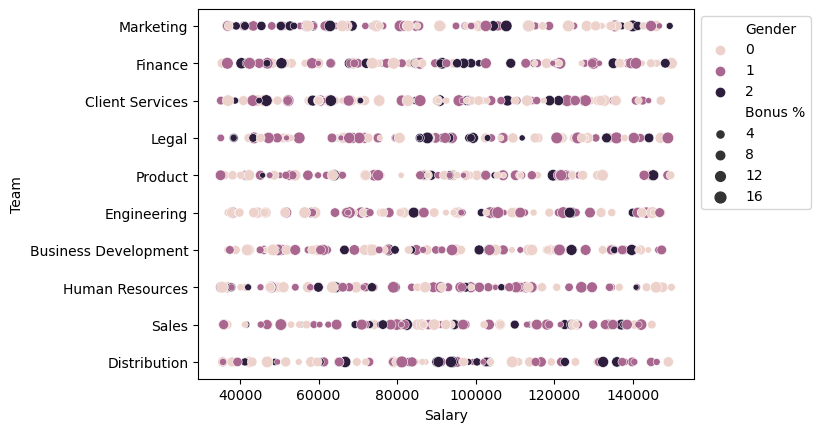

In [14]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
 
 
sns.scatterplot( x="Salary", y='Team', data=df,
                hue='Gender', size='Bonus %')
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

ValueError: object arrays are not supported

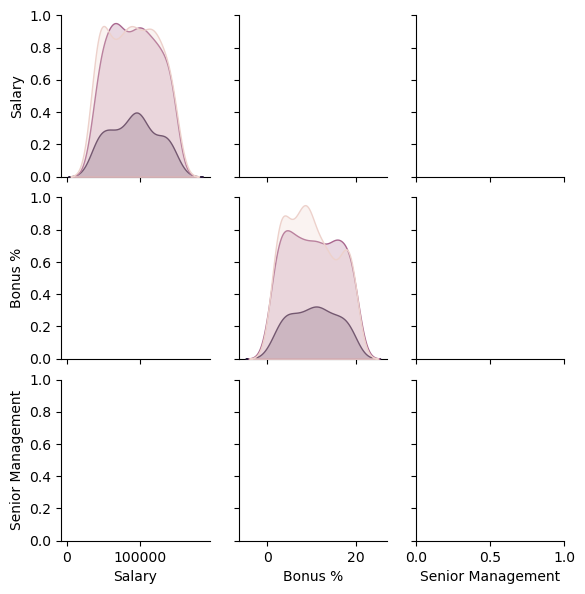

In [15]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
 
 
sns.pairplot(df, hue='Gender', height=2)

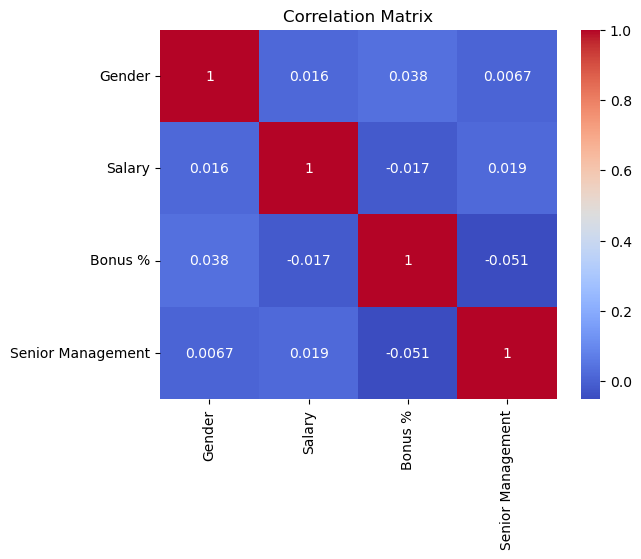

In [16]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 3 Hypothesis Testing

In [1]:
import numpy as np
from scipy import stats

# Data
before_treatment = np.array([120, 122, 118, 130, 125, 128, 115, 121, 123, 119])
after_treatment = np.array([115, 120, 112, 128, 122, 125, 110, 117, 119, 114])

# Step 1: Null and Alternate Hypotheses
# Null Hypothesis: The new drug has no effect on blood pressure.
# Alternate Hypothesis: The new drug has an effect on blood pressure.
null_hypothesis = "The new drug has no effect on blood pressure."
alternate_hypothesis = "The new drug has an effect on blood pressure."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(after_treatment, before_treatment)

# Step 4: Calculate T-statistic manually
m = np.mean(after_treatment - before_treatment)
s = np.std(after_treatment - before_treatment, ddof=1) # using ddof=1 for sample standard deviation
n = len(before_treatment)
t_statistic_manual = m / (s / np.sqrt(n))

# Step 5: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	conclusion = "There is statistically significant evidence that the average blood pressure before and after treatment with the new drug is different."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average blood pressure before and after treatment with the new drug."

# Display results
print("T-statistic (from scipy):", t_statistic)
print("P-value (from scipy):", p_value)
print("T-statistic (calculated manually):", t_statistic_manual)
print(f"Decision: {decision} the null hypothesis at alpha={alpha}.")
print("Conclusion:", conclusion)


T-statistic (from scipy): -9.0
P-value (from scipy): 8.538051223166285e-06
T-statistic (calculated manually): -9.0
Decision: Reject the null hypothesis at alpha=0.05.
Conclusion: There is statistically significant evidence that the average blood pressure before and after treatment with the new drug is different.


# 4 Model Evaluation Metrics in Machine Learning

[[13  0  0]
 [ 0 17  2]
 [ 0  0 18]]


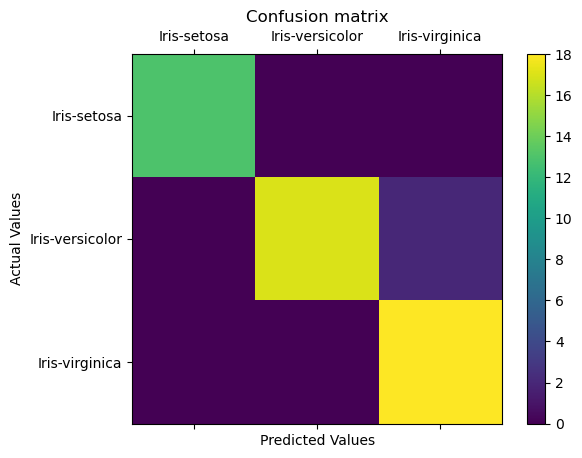

In [3]:
#A sample python implementation of the Confusion matrix.
import warnings
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline  

#ignore warnings
warnings.filterwarnings('ignore')
# Load digits dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url)
# df = df.values
X = df.iloc[:,0:4]
y = df.iloc[:,4]
#test size
test_size = 0.33
#generate the same set of random numbers
seed = 7
#Split data into train and test set. 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
#Train Model
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

#Construct the Confusion Matrix
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cm = confusion_matrix(y_test, pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [11]:
#We use the sklearn module to compute the accuracy of a classification task, as shown below.
#import modules
import warnings
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
#ignore warnings
warnings.filterwarnings('ignore')
# Load digits dataset
iris = datasets.load_iris()
# # Create feature matrix
X = iris.data
# Create target vector
y = iris.target
#test size
test_size = 0.33
#generate the same set of random numbers
seed = 7
#cross-validation settings
kfold = model_selection.KFold(n_splits=10,shuffle=True )
#Model instance
model = LogisticRegression()
#Evaluate model performance
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print('Accuracy -val set: %.2f%% (%.2f)' % (results.mean()*100, results.std()))

#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
#fit model
model.fit(X_train, y_train)
#accuracy on test set
result = model.score(X_test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

Accuracy -val set: 96.67% (0.04)
Accuracy - test set: 92.00%


In [15]:
#A sample python implementation of the F1 score.
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
test_size = 0.33
seed = 7

model = LogisticRegression()
# split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)

# predict values
pred = model.predict(X_test)

precision = precision_score(y_test, pred)
print('Precision: %f' % precision)

recall = recall_score(y_test, pred)
print('Recall: %f' % recall)

f1 = f1_score(y_test, pred)
print('F1 score: %f' % f1)


Precision: 0.701493
Recall: 0.552941
F1 score: 0.618421


AUC - Test Set: 82.85%


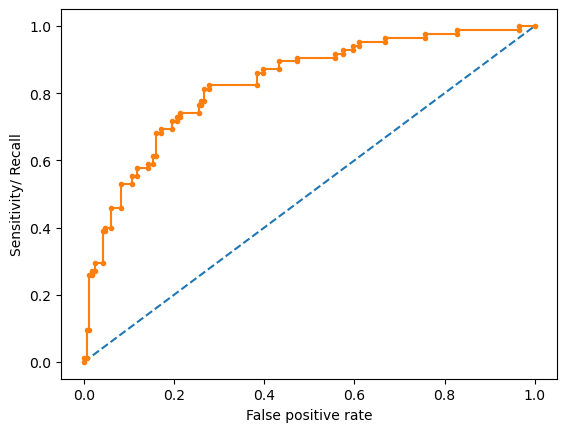

In [16]:
#A sample python implementation of the ROC curves.
#Classification Area under curve
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
seed = 7
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

In [17]:
#A sample python implementation of the Log Loss.
#Classification LogLoss
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

warnings.filterwarnings('ignore')
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
seed = 7
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)
#predict and compute logloss
pred = model.predict(X_test)
accuracy = log_loss(y_test, pred)
print("Logloss: %.2f" % (accuracy))

Logloss: 7.89


In [19]:
#A sample python implementation of the Jaccard index
import numpy as np

def compute_jaccard_similarity_score(x, y):
    intersection_cardinality = len(set(x).intersection(set(y)))
    union_cardinality = len(set(x).union(set(y)))
    return intersection_cardinality / float(union_cardinality)

score = compute_jaccard_similarity_score(np.array([0, 1, 2, 5, 6]), np.array([0, 2, 3, 5, 7, 9]))
print("Jaccard Similarity Score : %s" %score)
pass

Jaccard Similarity Score : 0.375


In [20]:
#A sample python implementation of the Kolmogorov-Smirnov.

from scipy.stats import kstest 
import random 
  
# N = int(input("Enter number of random numbers: ")) 
N = 10
  
actual =[] 
print("Enter outcomes: ") 
  
for i in range(N): 
    # x = float(input("Outcomes of class "+str(i + 1)+": ")) 
    actual.append(random.random()) 
  
print(actual) 
x = kstest(actual, "norm")    
print(x)

Enter outcomes: 
[0.8543337140325447, 0.3150221467884432, 0.9270798942403596, 0.8202487302285015, 0.7419678544155629, 0.6658800096178359, 0.6501459100482612, 0.2653572257634923, 0.3967623457473476, 0.2700083679179147]
KstestResult(statistic=0.6046328579007115, pvalue=0.0004950107507405608)


# 5 Regularization Techniques in Machine Learning

In [25]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.0/1.0 MB 526.1 kB/s eta 0:00:00
     ------------------------------------ 101.5/101.5 kB 324.6 kB/s eta 0:00:00
     ------------------------------------ 133.7/133.7 kB 439.4 kB/s eta 0:00:00
     ------------------------------------ 240.6/240.6 kB 289.1 kB/s eta 0:00:00
  Using cached pygments-2.17.2-py3-none-any.whl (1.2 MB)
     -------------------------------------- 87.5/87.5 kB 822.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.


In [29]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install --upgrade tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached protobuf-4.23.4-cp39-cp39-win_amd64.whl (422 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.2
    Uninstalling protobuf-4.25.2:
      Successfully uninstalled protobuf-4.25.2
Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install --upgrade numpy protobuf

Defaulting to user installation because normal site-packages is not writeable
  Using cached protobuf-4.25.2-cp39-cp39-win_amd64.whl (413 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.4
    Uninstalling protobuf-4.23.4:
      Successfully uninstalled protobuf-4.23.4
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\balun\\AppData\\Roaming\\Python\\Python39\\site-packages\\google\\~upb\\_message.cp39-win_amd64.pyd'
Check the permissions.



In [45]:
 pip install imread

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 130.0/130.0 kB 403.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for imread
Failed to build imread
  Running setup.py install for imread: started
  Running setup.py install for imread: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [108 lines of output]
  'pkg-config' is not recognized as an internal or external command,
  operable program or batch file.
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\imread
  copying imread\ijrois.py -> build\lib.win-amd64-cpython-39\imread
  copying imread\imread.py -> build\lib.win-amd64-cpython-39\imread
  copying imread\imread_version.py -> build\lib.win-amd64-cpython-39\imread
  copying imread\special.py -> build\lib.win-amd64-cpython-39\imread
  copying imread\__init__.py -> build\lib.win-amd64-cpython-39\imread
  creating build\lib.win-amd64-cpython-39\imread\tests
  copying imread\tests\test_bad.py -> build\lib.win-amd64-cpython-39\imread\tests
  copying imread\tests\test_bmp.py -> build\lib.win-amd64-cpython-39\imread\tests
  copying imread\tests\

In [49]:
pip install mglearn

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 581.4/581.4 kB 2.6 MB/s eta 0:00:00
     -------------------------------------- 14.9/14.9 MB 916.9 kB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.4 which is incompatible.


In [50]:
#In this section, we're going to apply L2 and L1 regularization techniques to the Boston Housing dataset and compare the training set score and test set score before and after using these techniques
import mglearn as ml
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from numpy import genfromtxt

dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [51]:
#print the training set score and the test set score:
lr = LinearRegression().fit(X_train, y_train)

print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.95
Linear Regression-Test set score: 0.61


In [52]:
#To avoid overfitting and control the complexity of the model, let's use ridge regression (L2 regularization) and see how well it does on the dataset:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.7).fit(X_train, y_train)
print(f"Ridge Regression-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_test, y_test):.2f}")

Ridge Regression-Training set score: 0.90
Ridge Regression-Test set score: 0.76


In [53]:
#Now, let's apply the lasso regression to the dataset and explore the results.
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0).fit(X_train, y_train)
print(f"Lasso Regression-Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_test, y_test):.2f}")

Lasso Regression-Training set score: 0.29
Lasso Regression-Test set score: 0.21


In [54]:
#If we want to know the exact number of features that have been used in the model, we can use the following code:
print(f"Number of features: {sum(lasso.coef_ != 0)}")


Number of features: 4


In [55]:
#Let's adjust alpha to reduce underfitting by decreasing its value to 0.01:
lasso = Lasso(alpha=0.01).fit(X_train, y_train)
print("Lasso Regression-Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Lasso Regression-Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

Lasso Regression-Training set score: 0.90
Lasso Regression-Test set score: 0.77


In [60]:
# ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.690e+01, tolerance: 3.233e+00
print(f"Number of features: {sum(lasso.coef_ != 0)}")

Number of features: 32


In [61]:
#Although we can reduce alpha even more, it seems that its optimum value is 0.01.
#The last technique that we're going to use is elastic net. Let's see how well it does.
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, y_train)
print(f"Elastic Net-Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, y_test):.2f}")

Elastic Net-Training set score: 0.84
Elastic Net-Test set score: 0.70


# 6 Locally weighted regression

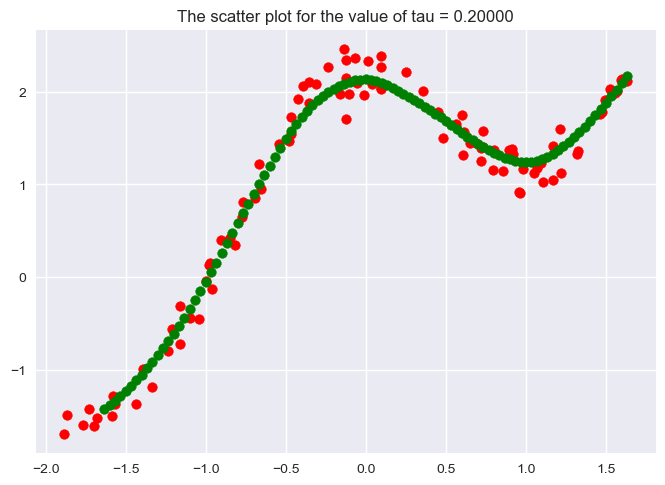

In [69]:
#Following is a self-implemented code of locally weighted regression
# Locally weighted linear regression (LWR)

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
class LocallyWeightedRegression:
    #maths behind Linear Regression:
    # theta = inv(X.T*W*X)*(X.T*W*Y)this will be our theta whic will 
    # be learnt for each point
    # initializer of LocallyWeighted Regression that stores tau as parameters
    def __init__(self, tau = 0.01):
        self.tau = tau
    def kernel(self, query_point, X):
        Weight_matrix = np.mat(np.eye(len(X)))
        for idx in range(len(X)):
            Weight_matrix[idx,idx] = np.exp(np.dot(X[idx]-query_point, (X[idx]-query_point).T)/(-2*self.tau*self.tau))
        return Weight_matrix
    # function that makes the predictions of the output of a given query point
    def predict(self, X, Y, query_point):
        q = np.mat([query_point, 1])
        X = np.hstack((X, np.ones((len(X), 1))))
        W = self.kernel(q, X)
        theta = np.linalg.pinv(X.T*(W*X))*(X.T*(W*Y))
        pred = np.dot(q, theta)
        return pred
    #function that fits and predicts the output of all query points
    def fit_and_predict(self, X, Y):
        Y_test, X_test = [], np.linspace(-np.max(X), np.max(X), len(X))
        for x in X_test:
            pred = self.predict(X, Y, x)
            Y_test.append(pred[0][0])
        Y_test = np.array(Y_test)
        return Y_test
    # function that computes the score rmse
    def score(self, Y, Y_pred):
        return np.sqrt(np.mean((Y-Y_pred)**2))
    # function that fits as well as shows the scatter plot of all points
    def fit_and_show(self, X, Y):
        Y_test, X_test = [], np.linspace(-np.max(X), np.max(X), len(X))
        for x in X_test:
            pred = self.predict(X, Y, x)
            Y_test.append(pred[0][0])
        Y_test = np.array(Y_test)
        plt.style.use('seaborn')
        plt.title("The scatter plot for the value of tau = %.5f"% self.tau)
        plt.scatter(X, Y, color = 'red')
        plt.scatter(X_test, Y_test, color = 'green')
        plt.show()
# reading the csv files of the given dataset
dfx = pd.read_csv('weightedX.csv')
dfy = pd.read_csv('weightedY.csv')
# store the values of dataframes in numpy arrays
X = dfx.values
Y = dfy.values
# normalising the data values
u = X.mean()
std = X.std()
X = ((X-u)/std)
tau = 0.2
model = LocallyWeightedRegression(tau)
Y_pred = model.fit_and_predict(X, Y)
model.fit_and_show(X, Y)

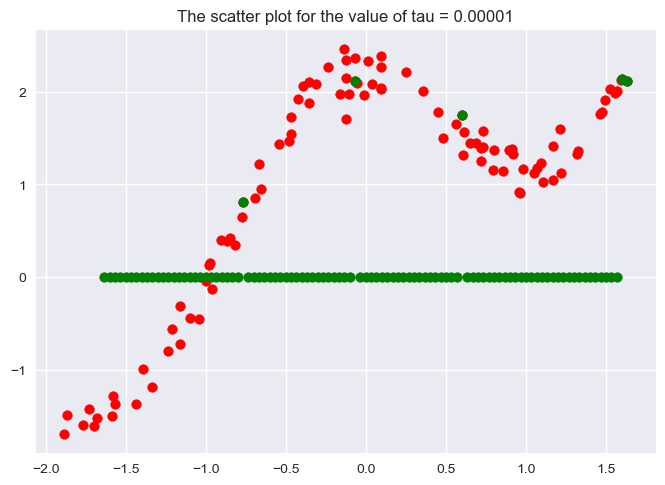

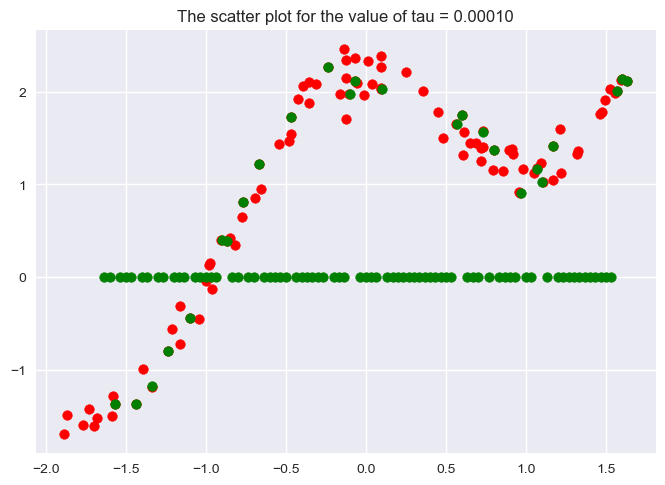

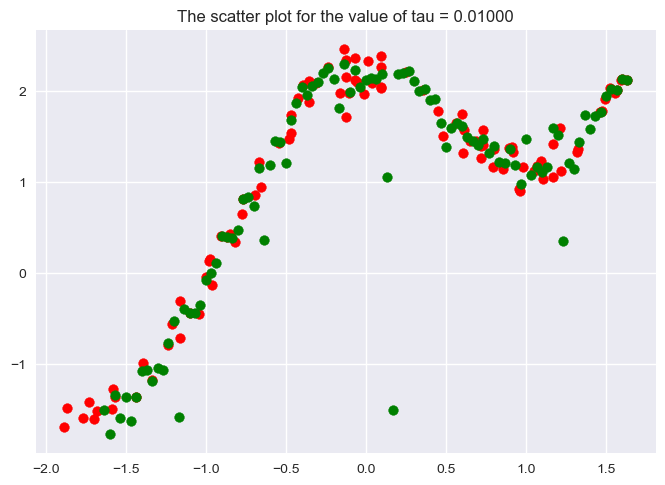

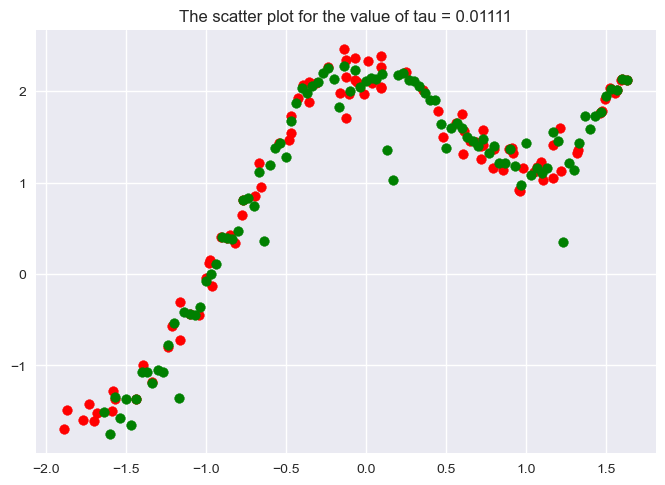

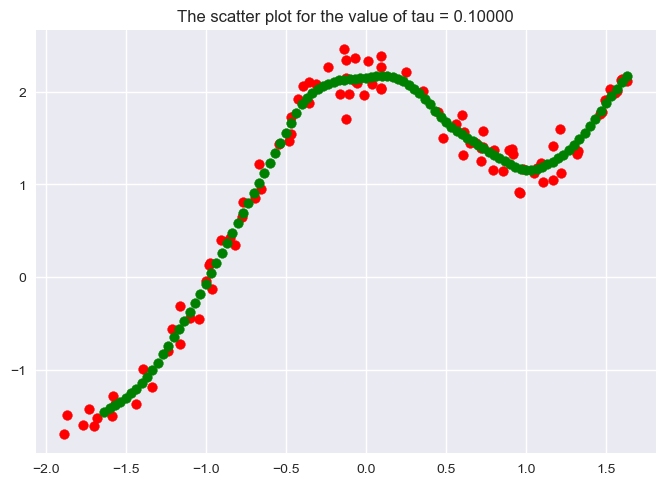

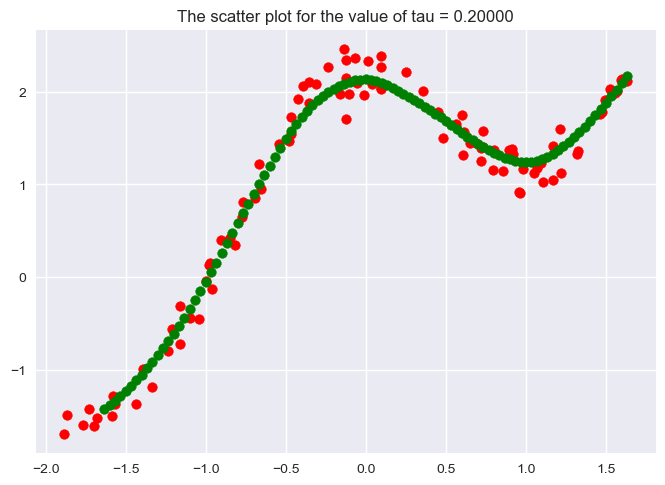

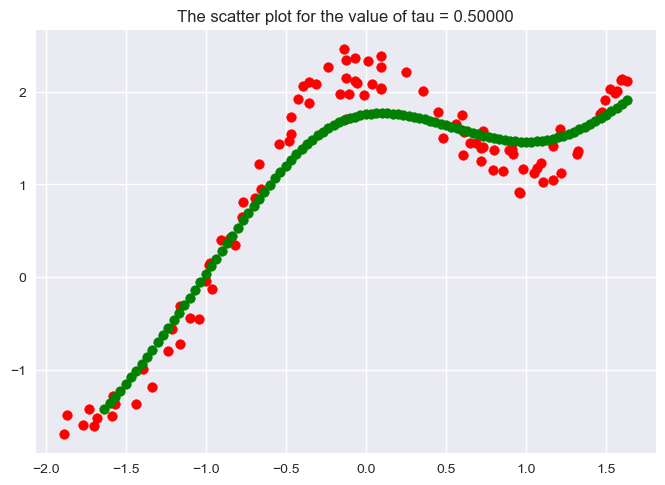

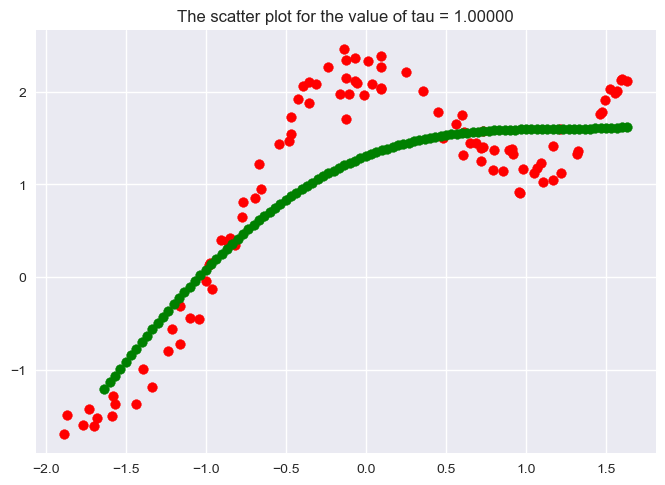

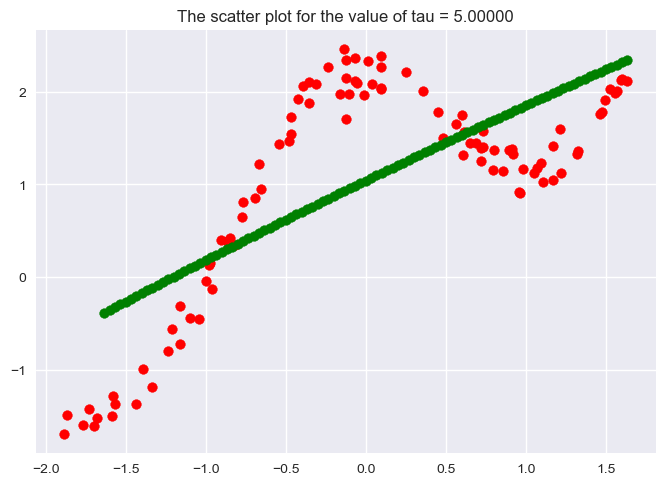

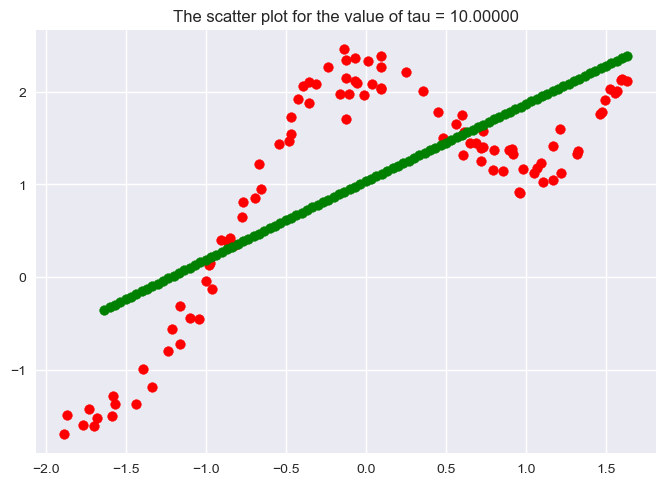

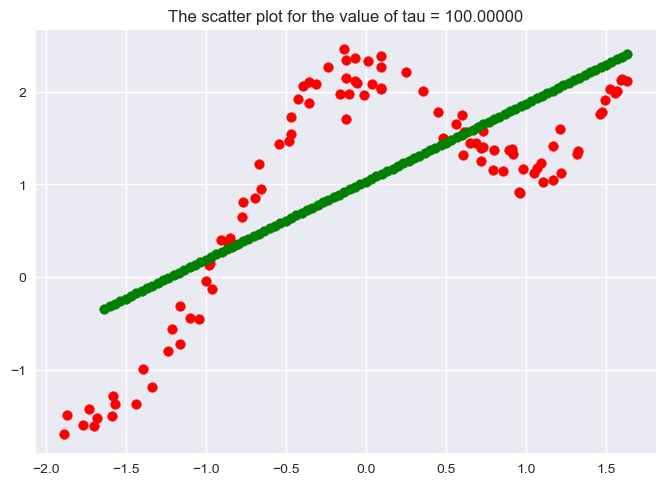

In [70]:
#There has been a lot of literature written on this parameter, but we will discuss the essential points only. Let’s first plot the curves for different values of ‘tau.’

tau_values = [0.00001, 0.0001, 0.01, 0.01111, 0.1,0.2,  0.5, 1, 5, 10, 100]
for t in tau_values:
    model = LocallyWeightedRegression(tau = t)
    Y_pred = model.fit_and_predict(X, Y)
    model.fit_and_show(X, Y)

# 7 k-nearest neighbor algorithms 

In [71]:
# Import necessary modules 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 

# Loading data 
irisData = load_iris() 

# Create feature and target arrays 
X = irisData.data 
y = irisData.target 

# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
			X, y, test_size = 0.2, random_state=42) 

knn = KNeighborsClassifier(n_neighbors=7) 

knn.fit(X_train, y_train) 

# Predict on dataset which model has not seen before 
print(knn.predict(X_test)) 


[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [72]:
# Import necessary modules 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 

# Loading data 
irisData = load_iris() 

# Create feature and target arrays 
X = irisData.data 
y = irisData.target 

# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
			X, y, test_size = 0.2, random_state=42) 

knn = KNeighborsClassifier(n_neighbors=7) 

knn.fit(X_train, y_train) 

# Calculate the accuracy of the model 
print(knn.score(X_test, y_test)) 


0.9666666666666667


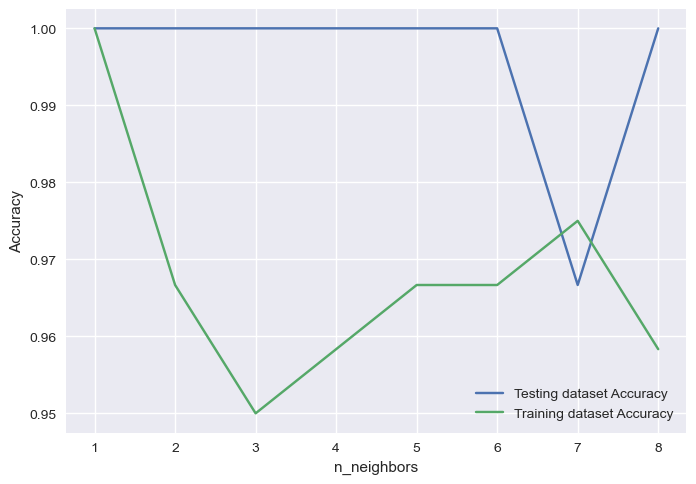

In [73]:
# Import necessary modules 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 
import numpy as np 
import matplotlib.pyplot as plt 

irisData = load_iris() 

# Create feature and target arrays 
X = irisData.data 
y = irisData.target 

# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
			X, y, test_size = 0.2, random_state=42) 

neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 

# Loop over K values 
for i, k in enumerate(neighbors): 
	knn = KNeighborsClassifier(n_neighbors=k) 
	knn.fit(X_train, y_train) 
	
	# Compute training and test data accuracy 
	train_accuracy[i] = knn.score(X_train, y_train) 
	test_accuracy[i] = knn.score(X_test, y_test) 

# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 

plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 


# Hierarchical Clustering

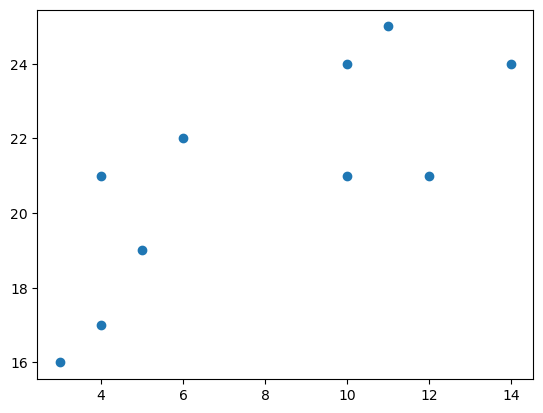

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

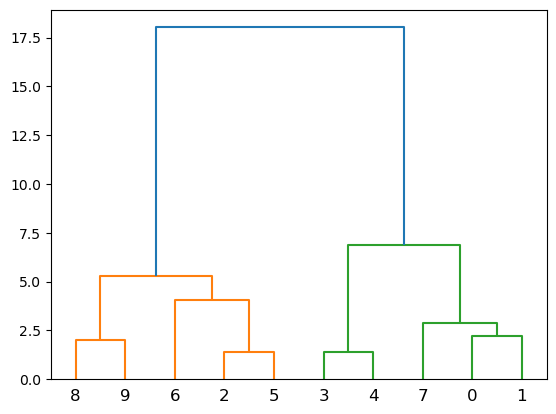

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

# 1. Perform Basic Visualizations (bar chart, scatter plot, box plot,histogram etc) for all the columns (numerical data only) on the specified dataset and draw the inferences for the visualizations in excel.

In [42]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
wheather_encoded=le.fit_transform(weather)
print("Weather:",wheather_encoded)
# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print("Temp:",temp_encoded)
print("Play:",label)
features=zip(wheather_encoded,temp_encoded)
final=list(features)
print("Features are:", final)
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(final,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)



Weather: [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
Features are: [(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]
Predicted Value: [1]


In [1]:
import pandas as pd

df1= pd.read_csv("bank_marketing.csv")

df1. head ()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


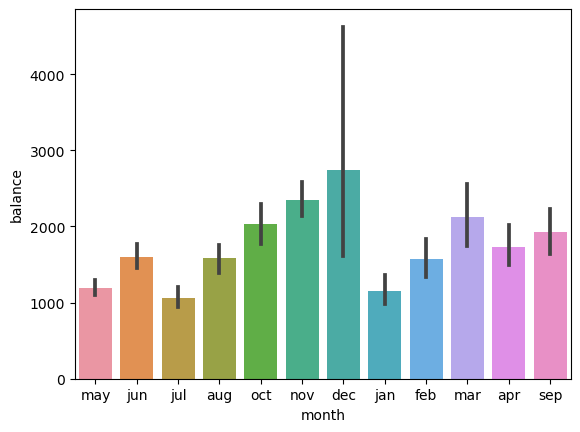

In [2]:
#Bar Chart:
import seaborn as sns

import matplotlib.pyplot as plt

sns.barplot (x ='month' ,y= 'balance', data=df1)

plt.show()

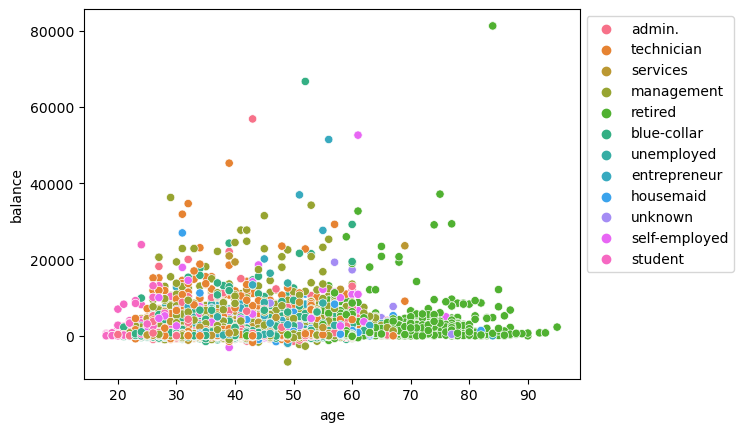

In [4]:
#Scatter plot :-

import seaborn as sns

import matplotlib.pyplot as plt

sns.scatterplot (x='age', y='balance', hue='job', data=df1)

plt.legend (bbox_to_anchor=(1,1),loc=2)

plt.show()

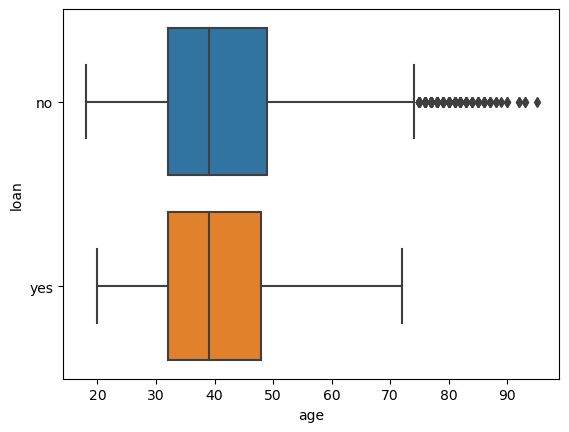

In [5]:
#Boxplot :-

import seaborn as sns

import matplotlib.pyplot as plt

sns.boxplot(x='age' ,y= 'loan', data=df1) 

plt.show()


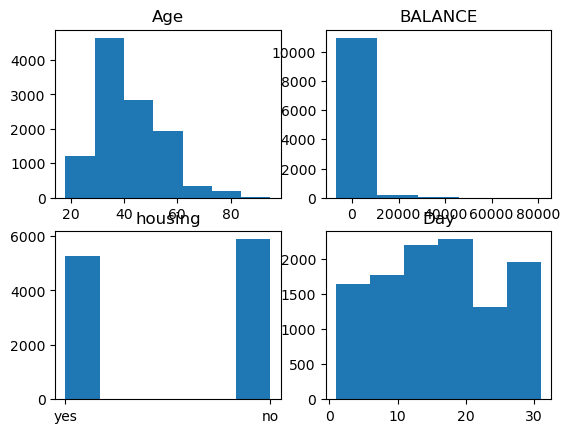

In [15]:
#Hictogram:

import seaborn as sns

import matplotlib.pyplot as pl

fig,axes = plt.subplots(2,2)

axes [0,0]. set_title ("Age")

axes [0,0]. hist (df1 ['age'], bins = 7); 

axes [0, 1].set_title("BALANCE"); 

axes [0, 1]. hist (df1 ['balance'], bins = 5); 

axes [1,0].set_title ("housing") 

axes [1,0].hist (df1 ['housing'], bins =6); 

axes [1,1 ].set_title ("Day");

axes [1,1 ]. hist (df1 ['day'], bins = 6);

# 2. Build a prediction model for simple linear regression.

In [43]:
# Importing Required files

import numpy as np
import pandas as pd
from sklearn import linear_model

In [55]:
#X represents the size of a tumor in centimeters.
m1 = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)

#Note: X has to be reshaped into a column from a row for the LogisticRegression() function to work.
#y represents whether or not the tumor is cancerous (0 for "No", 1 for "Yes").
n1 = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [56]:
m1

array([[3.78],
       [2.44],
       [2.09],
       [0.14],
       [1.72],
       [1.65],
       [4.92],
       [4.37],
       [4.96],
       [4.52],
       [3.69],
       [5.88]])

In [57]:
n1

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [58]:
#Fitting the model
logr = linear_model.LogisticRegression()
logr.fit(X,y)

LogisticRegression()

In [59]:
#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(np.array([3.46]).reshape(-1,1))
predicted

array([0])

# 3. Build a prediction model for multiple linear regression.

In [34]:
# Importing Required files

import numpy as np
import pandas as pd
from sklearn import linear_model

In [35]:
# Importing the dataset
df = pd.read_csv("data.csv")

In [36]:
df

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [37]:
# selecting dependent and independent variables
X = df[['Weight', 'Volume']]
y = df['CO2']

In [38]:
X

,Weight,Volume
0,790,1000
1,1160,1200
2,929,1000
3,865,900
4,1140,1500
5,929,1000
6,1109,1400
7,1365,1500
8,1112,1500
9,1150,1600


In [39]:
y

0      99
1      95
2      95
3      90
4     105
5     105
6      90
7      92
8      98
9      99
10     99
11    101
12     99
13     94
14     97
15     97
16     99
17    104
18    104
19    105
20     94
21     99
22     99
23     99
24     99
25    102
26    104
27    114
28    109
29    114
30    115
31    117
32    104
33    108
34    109
35    120
Name: CO2, dtype: int64

In [40]:
#fitting the model
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [41]:
#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300]])

print(predictedCO2)

[107.2087328]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:
import statsmodels.api as sm

# add constant to predictor variables
g1 = sm.add_constant(X)
# fit logistic regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    CO2   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              714.9
Date:                Fri, 23 Feb 2024   Prob (F-statistic):                    1.67e-28
Time:                        20:04:10   Log-Likelihood:                         -149.96
No. Observations:                  36   AIC:                                      303.9
Df Residuals:                      34   BIC:                                      307.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# 4.Build a prediction model to perform logistic regression

In [5]:
import numpy as np
import pandas as pd
from sklearn import linear_model

In [6]:
#X represents the size of a tumor in centimeters.

x123 = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88])

#Note: X has to be reshaped into a column from a row for the LogisticRegression() functi

#y represents whether or not the tumor is cancerous (@ for "No", 1 for "Yes").

y123 = np.array([0,0,0,0,0, 0, 1, 1, 1, 1, 1, 1])

In [7]:
x123

array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69,
       5.88])

In [8]:
y123

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [9]:
logr = linear_model.LogisticRegression()

logr.fit(x123,y123)

ValueError: Expected 2D array, got 1D array instead:
array=[3.78 2.44 2.09 0.14 1.72 1.65 4.92 4.37 4.96 4.52 3.69 5.88].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [10]:
LogisticRegression()
#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(np.array([3.46]).reshape(-1,1))
predicted
array([0])


NameError: name 'LogisticRegression' is not defined

In [11]:
import statsmodels.api as sm

# add constant to predictor variables
g1 = sm.add_constant(x123)
# fit linear regression model
model = sm.OLS(y123, x123).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.802
Model:                            OLS   Adj. R-squared (uncentered):              0.784
Method:                 Least Squares   F-statistic:                              44.65
Date:                Fri, 15 Mar 2024   Prob (F-statistic):                    3.46e-05
Time:                        20:05:02   Log-Likelihood:                         -3.1412
No. Observations:                  12   AIC:                                      8.282
Df Residuals:                      11   BIC:                                      8.767
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# 2. Simple Linear Regression in Machine Learning


In [1]:
#Simple Linear Regression in Machine Learning
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd

In [2]:
data = pd.read_csv('Salary_Data.csv')

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [5]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [6]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=0)


In [8]:
x_train

array([[ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [9]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

In [10]:
y_train

array([ 56642.,  66029.,  64445.,  61111., 113812.,  91738.,  46205.,
       121872.,  60150.,  39891.,  81363.,  93940.,  57189.,  54445.,
       105582.,  43525.,  39343.,  98273.,  67938.,  56957.])

In [11]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [13]:
y_pred = regressor.predict(x_test)
x_pred = regressor.predict(x_train)

In [14]:
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [15]:
x_pred

array([ 53919.42532909,  74480.49870396,  56723.20806202,  68872.93323808,
       103452.92027763,  90368.60085726,  38965.91742009, 124948.58789682,
        54854.0195734 ,  47377.2656189 ,  81957.25265845,  82891.84690277,
        61396.17928358,  56723.20806202, 110929.67423213,  45508.07713028,
        37096.72893147,  93172.3835902 ,  72611.31021533,  64199.96201652])

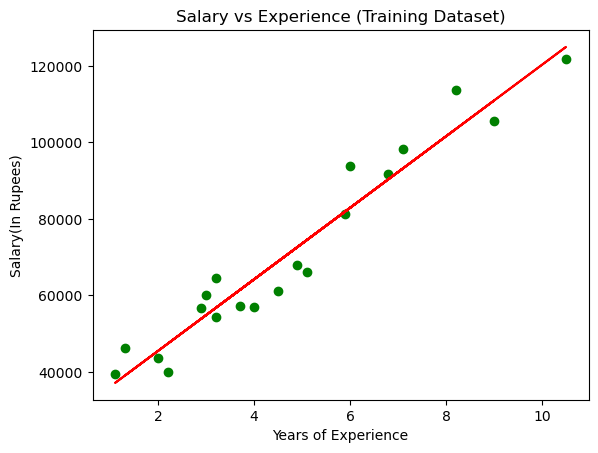

In [16]:
#visualizing the Training set results:
mtp.scatter(x_train, y_train, color="green")
mtp.plot(x_train, x_pred, color="red")
mtp.title("Salary vs Experience (Training Dataset)")
mtp.xlabel("Years of Experience")
mtp.ylabel("Salary(In Rupees)")
mtp.show()

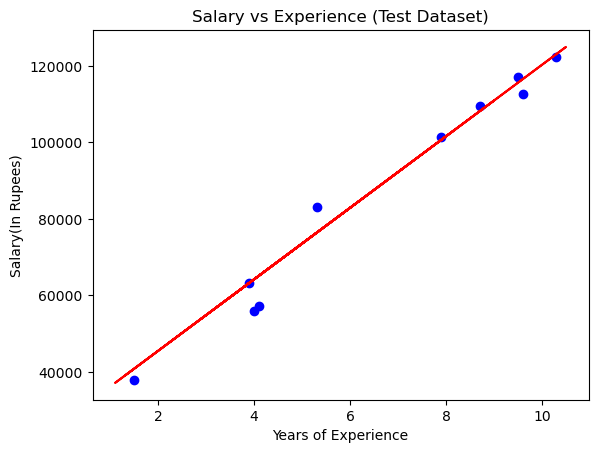

In [17]:
#visualizing the Test set results
mtp.scatter(x_test, y_test, color="blue")
mtp.plot(x_train, x_pred, color="red")
mtp.title("Salary vs Experience (Test Dataset)")
mtp.xlabel("Years of Experience")
mtp.ylabel("Salary(In Rupees)")
mtp.show()

In [22]:
import statsmodels.api as sm

# add constant to predictor variables
g1 = sm.add_constant(x_train)
# fit linear regression model
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              525.3
Date:                Fri, 23 Feb 2024   Prob (F-statistic):                    2.64e-15
Time:                        19:59:47   Log-Likelihood:                         -219.36
No. Observations:                  20   AIC:                                      440.7
Df Residuals:                      19   BIC:                                      441.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# 3.  Multiple Linear Regression 


In [23]:
#Multiple Linear Regression
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd

In [24]:
data = pd.read_csv('50_Startups.csv')

In [36]:
data


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [25]:
#Extracting independent and dependent variable(x=independent)
x2 = data.iloc[:, :-1]
y2 = data.iloc[:, 4]

In [26]:
x2

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [27]:
y2

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [28]:
#convert the column into categorical columns
states = pd.get_dummies(x2['State'],drop_first=True)

In [30]:
states

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0
5,0,1
6,0,0
7,1,0
8,0,1
9,0,0


In [31]:
#Drop the state column
x2 = x2.drop('State',axis=1)

In [32]:
x2

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [33]:
import statsmodels.api as sm

# add constant to predictor variables
g1 = sm.add_constant(x2)
# fit multiple linear regression model
model = sm.OLS(y2, x2).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Profit   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1232.
Date:                Fri, 23 Feb 2024   Prob (F-statistic):                    1.17e-44
Time:                        20:02:03   Log-Likelihood:                         -545.82
No. Observations:                  50   AIC:                                      1098.
Df Residuals:                      47   BIC:                                      1103.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

# 6.Perform clustering using k-means clustering algorithm.

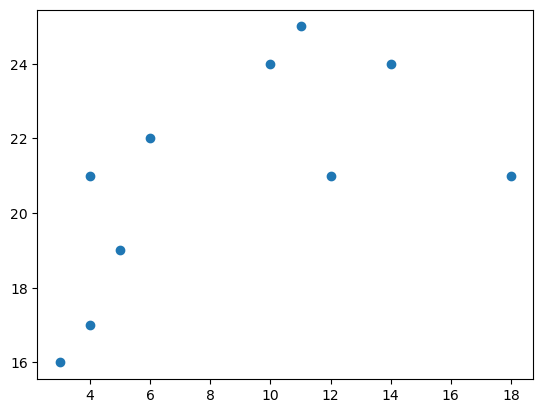

In [16]:
#1.Start by visualizing some data points:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 18, 12]

y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)

plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


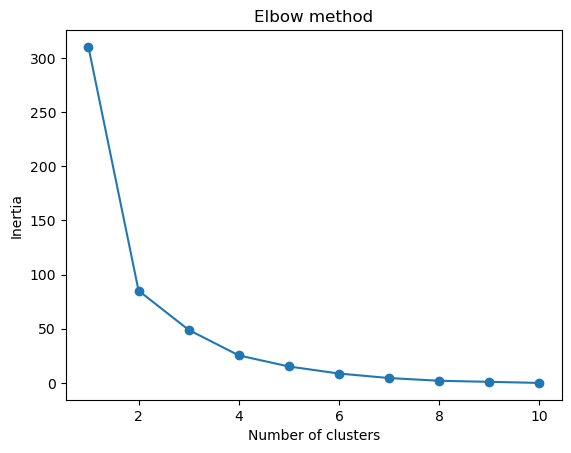

In [30]:
from sklearn.cluster import KMeans

data2 = list(zip(x, y))

inertias = []

for i in range(1,11):

     kmeans = KMeans(n_clusters=i)

     kmeans.fit(data2)

     inertias.append(kmeans.inertia_)
    

plt.plot(range(1,11), inertias, marker='o')

plt.title('Elbow method')

plt.xlabel('Number of clusters')

plt.ylabel( 'Inertia')

plt.show()

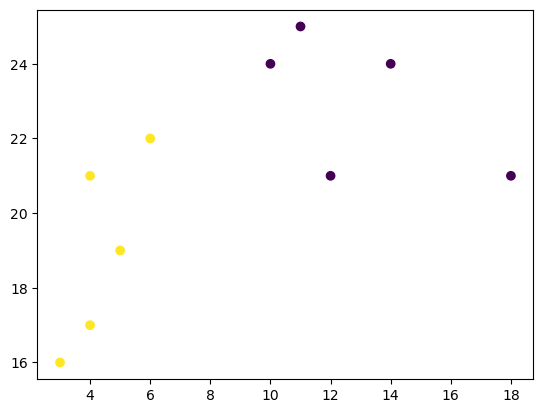

In [32]:
#3,The elbow method shows that 2 is a good value for K, so we retrain and visualize the results:

kmeans = KMeans(n_clusters=2)

kmeans.fit(data2)

plt.scatter(x, y, c=kmeans.labels_)

plt.show()



# 7. Perform Principle Component Analysis and then perform clustering.

In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch

In [39]:
df = pd.read_csv("7_wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [40]:
y= df['Type']
df1 = df.iloc[:, 1:]
df1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [41]:
y #actual clusters 

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Type, Length: 178, dtype: int64

In [42]:
#Feature Scaling
# normalizing the data 
df_norm = StandardScaler().fit_transform(df1) 

In [43]:
df_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [44]:
#Dimensionality reduction with PCA
# Applying PCA function
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(df_norm)

In [45]:
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

([<matplotlib.axis.XTick at 0x1b710d83490>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [46]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [47]:
PCA_components = pd.DataFrame(principalComponents)


In [48]:
PCA_components

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


In [49]:
wcss = [] 
for i in range(1, 15): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(PCA_components.iloc[:,:3]) 
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [50]:
plt.plot(range(1, 15), wcss)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show() 

C:\Users\balun\AppData\Local\Temp\ipykernel_1996\1869457853.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [51]:
model = KMeans(n_clusters=3)
labels=model.fit_predict(PCA_components.iloc[:,:2])

In [52]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [53]:
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

C:\Users\balun\AppData\Local\Temp\ipykernel_1996\696957613.py:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [54]:
df_r=pd.DataFrame({'Actual':y, 'Predicted':labels})
df_r.head()

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


# 8. Prepare a Classification model using decision tree Classifier.

In [44]:
#Three lines to make our compiler able to draw:

import sys

import matplotlib

matplotlib.use('Agg')

import pandas as pd

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

df = pd.read_csv("DTree.csv")

print (df)

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


In [45]:
d = {'UK': 0, 'USA': 1, 'N': 2}

df ['Nationality'] = df ['Nationality'].map(d)

d={'YES': 1, 'NO': 0}

df['Go'] = df['Go'] .map(d)

print (df)



    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


In [46]:
 features = ['Age', 'Experience', 'Rank', 'Nationality']

x3= df[features]

y3=df ['Go']



In [47]:
x3

,Age,Experience,Rank,Nationality
0,36,10,9,0
1,42,12,4,1
2,23,4,6,2
3,52,4,4,1
4,43,21,8,1
5,44,14,5,0
6,66,3,7,2
7,35,14,9,0
8,52,13,7,2
9,35,5,9,2


In [48]:
y3

0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64

In [52]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x3, y3)

tree.plot_tree(dtree, feature_names=features) 


[Text(0.4, 0.9, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6, 0.7, 'Nationality <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.4, 0.5, 'Experience <= 9.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.3, 'Experience <= 12.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

In [50]:
plt.savefig('decision_tree.png')

# 9) Prepare a Classification model using Navie Bayes Classifier

In [45]:
#Step-1:Assigning features and label variables

weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',

'Rainy','Sunny','Overcast','Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']



In [47]:
#Step-2: Encoding the data
# Import LabelEncoder

from sklearn import preprocessing

#creating labelEncoder

le = preprocessing.LabelEncoder()

# Converting string labels into numbers.

wheather_encoded=le.fit_transform(weather)

print(wheather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [52]:
# Converting string labels into numbers

temp_encoded=le.fit_transform(temp)

label=le.fit_transform(play)

print("Temp:",temp_encoded)

print("Play:",label)

Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [55]:
#Step-3:Combinig weather and temp into single listof tuples

features=zip(wheather_encoded,temp_encoded)

final=list(features)
final

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [54]:
#Step-4: Fitting the model and predicting the classfier

#Import Gaussian Naive Bayes model

from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier

model = GaussianNB()

# Train the model using the training sets

model.fit(final,label)

#Predict Output

predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild

print("Predicted Value:", predicted)

Predicted Value: [1]


In [14]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
wheather_encoded=le.fit_transform(weather)
print("Weather:",wheather_encoded)
# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print("Temp:",temp_encoded)
print("Play:",label)
features=zip(wheather_encoded,temp_encoded)
final=list(features)
print("Features are:", final)
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(final,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted) 



Weather: [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
Features are: [(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]
Predicted Value: [1]


# Apriori Algorithm --weak5

In [8]:
pip install apyori

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import comb
from itertools import combinations, permutations
from apyori import apriori as apr
from mlxtend.frequent_patterns import apriori, association_rules
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\ProgramData\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [13]:
df = pd.read_csv("5_my_movies.csv")
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [14]:
df1 = df.iloc[:,5:]
df1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [15]:
df1 = df.iloc[:,5:]
df1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [16]:
df1.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [17]:
#Setting different thresholds
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [22]:
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(df1,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)
confs = []
ap_i = gen_rules(df1,confidence=confidence,support=0.1)
confs.append(ap_i)
all_conf = pd.concat(confs,axis=1)

C:\Users\balun\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\balun\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\balun\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\balun\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_pattern

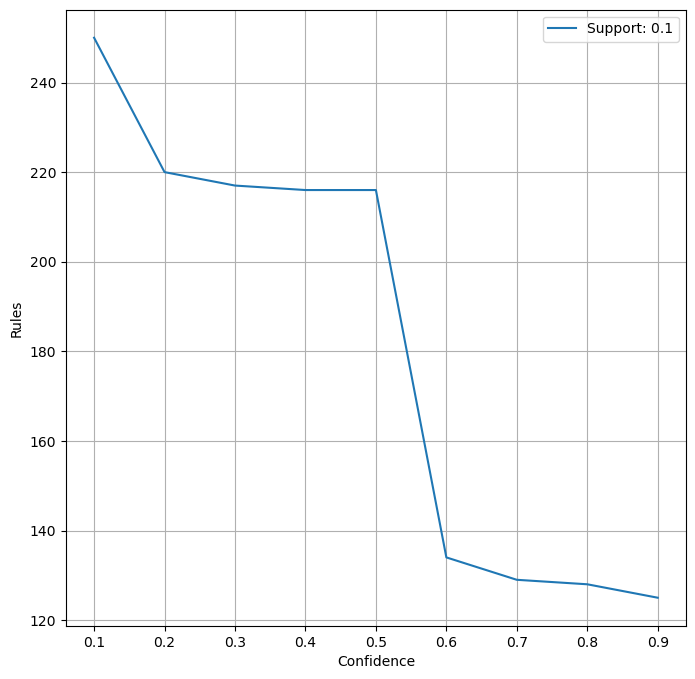

In [23]:
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

In [24]:
confs = []
ap_i = gen_rules(df1,confidence=confidence,support=0.2)
confs.append(ap_i)
all_conf = pd.concat(confs,axis=1)

C:\Users\balun\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\balun\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\balun\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\balun\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_pattern

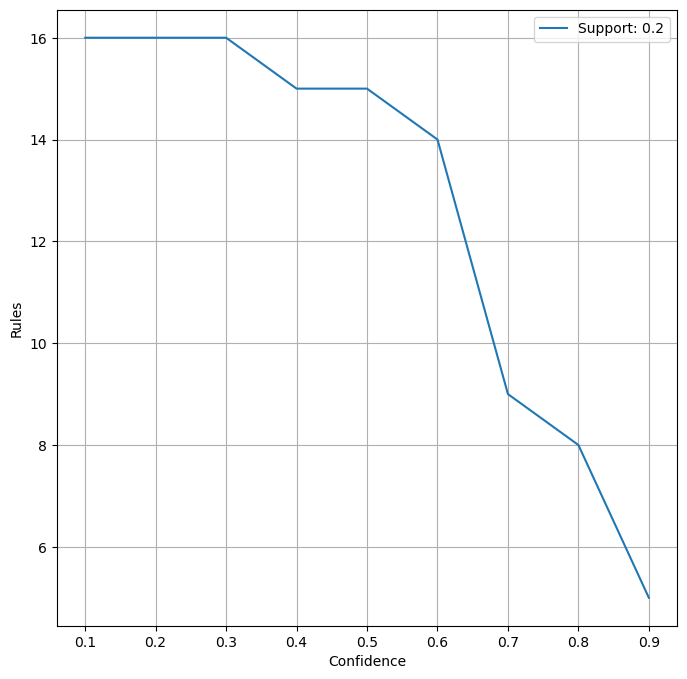

In [25]:
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()